# How are skills trending for Data Scientists in the US?

## Methodology

1. Aggregate skill counts per month
2. Calculate skill percentage based on total of jobs
3. Plot the monthly skill demand

In [1]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load csv
df = pd.read_csv('/Users/davidkim/Downloads/data_jobs.csv')

#Data cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(
    lambda skills: ast.literal_eval(skills)
    if pd.notnull(skills) else skills)

In [14]:
#Filter for Data Scientist jobs in the US
df_DS_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()
 

In [15]:
#Add column for month of job posting
df_DS_US['job_posted_month_no'] = df_DS_US['job_posted_date'].dt.month

#Expand (explode) job skills column 
df_DS_US_explode = df_DS_US.explode('job_skills')

In [33]:
#Create pivot table of job posted month and all the skills for Data Scientist jobs
df_DS_US_pivot = df_DS_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

#Create a total row to find total # of job postings with 'x' skill for all months
df_DS_US_pivot.loc['Total'] = df_DS_US_pivot.sum()

#Sort pivot table by total column
df_DS_US_pivot = df_DS_US_pivot[df_DS_US_pivot.loc['Total'].sort_values(ascending=False).index]

#Drop the total column to get back original table sorted
df_DS_US_pivot = df_DS_US_pivot.drop('Total')

df_DS_US_pivot.head()

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,5243,3770,3362,1700,1630,1364,1356,916,896,817,...,0,0,1,1,0,1,0,0,1,1
2,3718,2670,2334,1144,1268,854,895,645,565,573,...,0,0,0,0,0,0,0,0,0,0
3,3394,2426,2189,1144,1126,848,787,575,529,538,...,0,0,0,0,1,0,0,0,0,0
4,3622,2463,2181,1204,1213,882,823,622,582,538,...,0,0,0,0,0,0,0,0,0,0
5,3232,2293,2016,1150,1174,797,774,629,517,521,...,0,0,0,0,0,0,0,0,0,0


In [32]:
#Get total # of Data Scientist Jobs in the US for each month
df_DS_total = df_DS_US.groupby(by='job_posted_month_no').size()

#Change pivot table to have % of jobs that require 'x' skill
df_DS_US_perc = df_DS_US_pivot.div((df_DS_total/ 100), axis=0)

In [34]:
#Change month number to month name
df_DS_US_perc = df_DS_US_perc.reset_index()
df_DS_US_perc['job_posted_month'] = df_DS_US_perc['job_posted_month_no'].apply(
    lambda x: pd.to_datetime(x, format='%m').strftime('%b')
    )
df_DS_US_perc = df_DS_US_perc.set_index('job_posted_month')
df_DS_US_perc = df_DS_US_perc.drop(columns='job_posted_month_no')

df_DS_US_perc.head()

job_skills,python,sql,r,sas,tableau,aws,spark,java,tensorflow,azure,...,fedora,mattermost,nuix,asp.net core,shogun,clickup,ocaml,wrike,symfony,couchdb
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,75.820680,54.519161,48.618944,24.584237,23.571945,19.725235,19.609544,13.246565,12.957339,11.814895,...,0.0,0.0,0.014461,0.014461,0.000000,0.014461,0.0,0.0,0.014461,0.014461
Feb,75.020178,53.874092,47.094431,23.083132,25.585149,17.231638,18.058918,13.014528,11.400323,11.561743,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
Mar,71.019042,50.763758,45.804562,23.938062,23.561415,17.744298,16.467880,12.031806,11.069261,11.257585,...,0.0,0.0,0.000000,0.000000,0.020925,0.000000,0.0,0.0,0.000000,0.000000
Apr,74.419560,50.606123,44.811999,24.738032,24.922950,18.122046,16.909801,12.779947,11.958085,11.054037,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
May,73.840530,52.387480,46.058944,26.273703,26.822024,18.208819,17.683345,14.370573,11.811743,11.903130,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


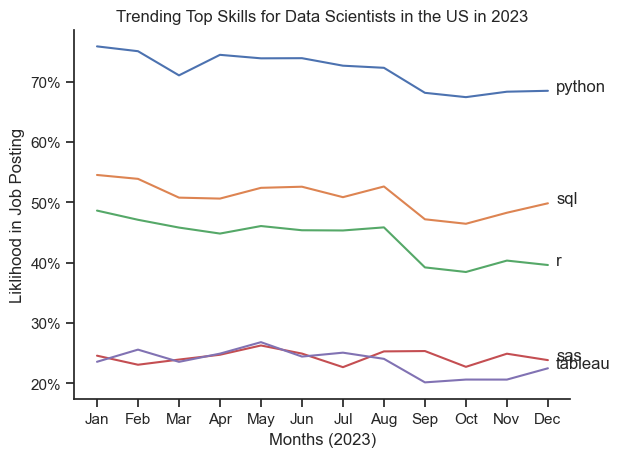

In [49]:
#Get top 5 most popular skills
df_plot = df_DS_US_perc.iloc[:, 0:5]

#Create plot
sns.set_theme(style='ticks')
sns.lineplot(data=df_plot, dashes=False)
sns.despine()

#Label plot
plt.title('Trending Top Skills for Data Scientists in the US in 2023')
plt.ylabel('Liklihood in Job Posting')
plt.xlabel('Months (2023)')
plt.legend().remove()

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(PercentFormatter())

for i in range(5):
    plt.text(11.2, df_plot.iloc[-1, i], df_plot.columns[i])

plt.show()
